In [1]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

### Instrucciones  y metodología asíncrona
Hola a todas y todos

- Este notebook forma parte del curso **INFO147: Computación científica con Python** de la carrera de Ingeniería Civil Informática de la Universidad Austral de Chile
- El profesor responsable es **Pablo Huijse**, por favor hacer sus consultas por slack o al correo phuijse at inf dot uach dot cl
- El material del curso se encuentra en https://github.com/magister-informatica-uach/INFO147 
- Se recomienda tener una copia local actualizada del repositorio


Para estudiar este material de forma asíncrona se recomienda seguir el flujo que se presenta a continuación

```bash 
for sección in notebook
do
    leer(sección) # Para incorporar los nuevos contenidos
    if ejercicios in sección
        resolver(ejercicios) # Para poner en práctica lo aprendido
    if video in sección
        ver(video) # Para profundizar y analizar la solución del ejercicio
done
```

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Regresión lineal en profundidad


Una **regresión** consiste en **ajustar** un modelo paramétrico

$$
f_\theta: x \rightarrow y
$$

Los objetivos del análisis de regresión son

> Encontrar como dos o más variables se relacionan

> Explicar/Predecir una variable en función de otras

Hablamos de **regresión lineal** cuando el modelo $f_\theta$ es **lineal en sus parámetros**

Es decir lo podemos escribir como

$$
\begin{align}
f_\theta(x) &= \langle x, \theta \rangle \nonumber \\
&= \begin{pmatrix} x_1 & x_2 & \ldots & x_M \end{pmatrix} \begin{pmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_M \end{pmatrix} 
\end{align}
$$



Para ajustar el modelo usamos **datos**: Un conjunto de $N$ tuplas $(\vec x_i, y_i)$ con $i=1,2,\ldots,N$, donde $\vec x$ son las variables independientes e $y$ es la variable dependiente

> Cada tupla aporta una ecuación al sistema

La cantidad parámetros $\theta$ del modelo $M$ es, en general, decidida por el usuario

> Cada parámetro aporta una incognita al sistema

Ajustar el modelo se refiere a encontrar el valor óptimo de $\theta$

- Si nuestro sistema es cuadrado podemos usar inversión
- Si nuestro sistema es rectangular podemos usar **mínimos cuadrados**

## Regresión lineal multivariada

En la lección anterior ajustamos el modelo

$$
f_\theta(x) = \theta_0 + \theta_1 x
$$

> Esto corresponde a ajustar una recta

En general queremos ajustar un modelo con $x$ es multidimensional

Si tenemos $d$ atributos podemos construir un vector $\vec x = (x_1, x_2, \ldots, x_d)$ y considerar el siguiente modelo lineal

$$
\begin{align}
f_\theta(\vec x) &= \theta_0  + \theta_1 x_1 + \theta_2 x_2 + \ldots \theta_d x_d  \nonumber \\
&= \theta_0  + \sum_{k=1}^d \theta_k x_k \nonumber \\
\end{align}
$$

> Esto corresponde a ajustar un **hiperplano**

**Ejercicio**

Para los datos de consumo de helados

Encuentre los parámetros del **hiperplano** que ajuste mejor los datos 

$$
\text{consumo} = \theta_0 + \theta_1 \cdot \text{temperatura} + \theta_2 \cdot \text{precio}
$$

- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?
- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?
- Encuentre $\theta$ que minimiza la suma de errores cuadráticos
- Grafique el plano encontrado

In [3]:
# Completa aquí 


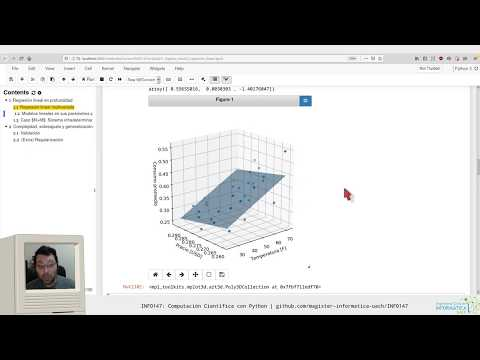

In [4]:
YouTubeVideo_formato('h6KrwiQv5qU')

## Modelos lineales en sus parámetros pero no en sus entradas

Una regresión lineal puede considerar transformaciones no lineales sobre la entrada $x$

Llamamos función base $\phi_j(\cdot)$ a estas transformaciones

El modelo más general de regresión lineal en sus parámetros es

$$
y = f_\theta (x) = \sum_{j=0}^N \theta_j \phi_j (x)
$$

**Ejemplo**

Si usamos $\phi_j(x) = x^j$ 

$$
y = f_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots
$$

> Obtenemos una regresión polinomial

**Ejemplo**

Si usamos $\phi_j(x) = \cos(2\pi j x)$

$$
y = f_\theta (x) = \theta_0 + \theta_1 \cos(2\pi x) + \theta_2 \cos(4 \pi x) + \ldots
$$

> Obtenemos una regresión trigonométrica

**Ejercicio**

Considere los siguientes datos:

In [5]:
np.random.seed(1234)
x = np.linspace(0, 2, num=10)
y = 2*np.cos(2.0*np.pi*x) + np.sin(4.0*np.pi*x) + 0.4*np.random.randn(len(x))
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)

- Realice una regresión polinomial sobre $(x, y)$ 
- Muestre graficamente los datos y el resultado de $f_\theta(x_{plot})$ 
- Use Jupyter widgets para modificar dinamicamente el grado del polinomio entre $M\in[1, 15]$


¿Qué ocurre cuando $N\geq M$?

> Nuestro modelo se sobre ajusta a los datos

Estudiaremos esto en detalle más adelante

In [6]:
#Completa tu solución aquí


In [7]:
YouTubeVideo_formato('KvIyri8lVq4')

## Caso $N>M$: Sistema infradeterminado

El caso infradeterminado es aquel que tiene más incognitas (parámetros) que ecuaciones

Este tipo de sistema tiene infinitas soluciones


**Ejemplo** 

Dos datos con polinomio de segundo orden (tres parámetros)

Es decir dos ecuaciones y tres incognitas

<IPython.core.display.Javascript object>


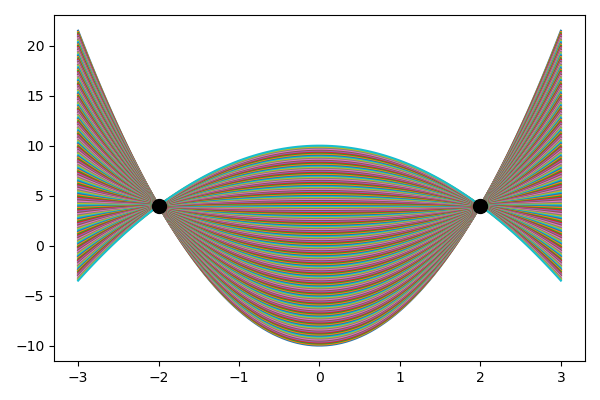

In [8]:
x = np.array([-2, 2])
y = np.array([4, 4])
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
x_plot = np.linspace(-3, 3, num=100)
thetas = np.zeros(shape=(200, 3))
for i, a in enumerate(np.linspace(-10, 10, num=thetas.shape[0])):
    ax.plot(x_plot, a  + (1 - a/4)*x_plot**2)
    thetas[i:] = [a, 0, (1-a/4)]
ax.scatter(x, y, s=100, c='k', zorder=10);

> En estos casos $A^T A$ no es invertible

El problema infradeterminado se resuelve imponiendo una restricción adicional

La más típica es que el vector solución tenga norma mínima

$$
\min_\theta \| x \|_2^2 ~\text{s.a.}~ Ax =b
$$

que se resuelve usando $M$ multiplicadores de Lagrande

$$
\begin{align}
\frac{d}{dx} \| x\|_2^2 + \lambda^T (b - Ax) &= 2x - \lambda^T A  \nonumber \\
&= 2Ax - A A^T \lambda \nonumber \\
&= 2b - A A^T \lambda = 0 \nonumber \\
&\rightarrow \lambda = 2(AA^T)^{-1}b \nonumber \\
&\rightarrow x = \frac{1}{2} A^T \lambda = A^T (A A^T)^{-1} b
\end{align}
$$

> donde $A^T (A A^T)^{-1}$ se conoce como la pseudo-inversa "por la derecha"

La función `np.linalg.lstsq` usa la pseudo inversa izquierda si $N<M$ o la pseudo inversa derecha si $N>M$

> Se asume que la mejor solución del sistema infradeterminado es la de **mínima norma euclidiana**

# Complejidad, sobreajuste y generalización

Un modelo con más parámetros es más flexible pero también más complejo

> Complejidad: grados de libertad de un modelo

Como vimos en el ejemplo un exceso de flexibilidad puede producir un **ajuste perfecto**

Debemos considerar que nuestros datos casi siempre tendrán ruido

> Sobreajuste: Ocurre cuando el modelo se ajusta al ruido de los datos

<IPython.core.display.Javascript object>


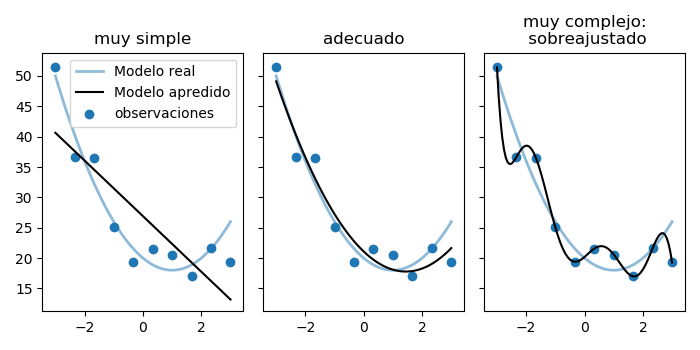

In [9]:
x = np.linspace(-3, 3, num=10)
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)
y_clean = np.poly1d([2, -4, 20]) # 2*x**2 -4*x +20
np.random.seed(1234)
y = y_clean(x) + 3*np.random.randn(len(x))
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
fig, ax = plt.subplots(1, 3, figsize=(7, 3.5), 
                       tight_layout=True, sharex=True, sharey=True)

for i, (M, title) in enumerate(zip([2, 3, 10], ["muy simple", "adecuado", "muy complejo:\n sobreajustado"])):
    ax[i].plot(x_plot, y_clean(x_plot), lw=2, alpha=.5, label='Modelo real')
    ax[i].scatter(x, y, label='observaciones'); 
    theta = np.linalg.lstsq(poly_basis(x, M), y, rcond=None)[0]
    ax[i].plot(x_plot, np.dot(poly_basis(x_plot, M), theta), 'k-', label='Modelo apredido')
    ax[0].legend()
    ax[i].set_title(title)

Cuando el modelo se sobreajusta pierde capacidad de generalización

> Generalización: Capacidad de predecir adecuadamente los datos que no se usan en el ajuste


Los siguientes tres mecanísmos se pueden usar para evitar el sobreajuste y mejorar la capacidad de generalización

- Validación: Escoger la complejidad mediante pruebas de validación 
- Regularización: Penalizar la complejidad

## Validación

Consiste en dividir el conjunto de datos en 3 subconjuntos
1. Entrenamiento: Datos que se ocupan para **ajustar el modelo**
1. Validación: Datos que se ocupan para **calibrar el modelo**
1. Prueba: Datos que se ocupan para comparar distintos modelos y estimar el error de generalización

Los datos de validación y prueba están "escondidos" para el modelo

> Ajustamos nuestro modelo minimizando el error de entrenamiento

> Seleccionamos la cantidad de parámetros minimizando el error de validación

Un modelo sobreajustado tiene buen desempeño en entrenamiento y malo en validación

Tipicamente se hacen **particiones aleatorias** del conjunto original que sean **representativas** del mismo

**Ejercicio**

Considere los siguientes datos

In [10]:
x = np.linspace(-5, 5, num=30)
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)
y_clean = np.poly1d([0.1, -0.3, -2, 10]) 
np.random.seed(1234)
y = y_clean(x) + 1.5*np.random.randn(len(x))
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T

Considere el modelo de regresión polinomial

- Separé los datos (x,y) aleatoriamente para crear conjuntos de entrenamiento y validación
    - Puede usar `np.random.permutation` 
- Entrene con el conjunto de entrenamiento
- Encuentre el grado de polinomio que mejor ajusta los datos en validación según el error cuadrático medio:
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N e_i^2
$$

donde $e_i = y_i - f_\theta(x_i)$

In [11]:
# Completa aquí


In [12]:
YouTubeVideo_formato()

functools.partial(<class 'IPython.lib.display.YouTubeVideo'>, modestbranding=1, disablekb=0, width=640, height=360, autoplay=0, rel=0, showinfo=0)

## (Extra) Regularización

Consiste en agregar una penalización adicional al problema 

El ejemplo clásico es agregar que la solución tenga norma mínima

$$
\min_x \|Ax-b\|_2^2 + \lambda \|x\|_2^2
$$

En este caso la solución es

$$
\hat x = (A^T A + \lambda I)^{-1} A^T b
$$

que se conoce como **ridge regression** o **regularización de Tikhonov**

$\lambda$ es un hiper-parámetro del modelo y debe ser escogido por el usuario (usando validación)